### Situation

You're a data scientist working for a car company, your job is to determine when a customer will purchase a new SUV car given its age and estimated salary. The endgame is to show an ad to the customers which prediction is 1.

## Logistic Regression

### Importing libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Dataset

In [2]:
dataset_path = "../../../../datasets/ml_az_course/006_social_network_ads.csv"

df = pd.read_csv(dataset_path)
df


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Splitting the dataset

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### Feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(X=x_train)
x_test = sc.transform(X=x_test)


In [6]:
type(x_train)

numpy.ndarray

### Training

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression(random_state=42)

In [9]:
model.fit(X=x_train, y=y_train)

LogisticRegression(random_state=42)

### Predicting a new result

In [10]:
x_test[0] # age and salary estimated

array([ 0.812419  , -1.39920777])

In [11]:
single_pred = model.predict(X=[x_test[0]])
single_pred # doesn't purchase the SUV car

array([0])

In [12]:
assert single_pred[0] == y_test[0]

In [13]:
single_pred = model.predict(X=sc.transform(X=[[25, 1800]]))
single_pred

array([0])

### Predicting the test set result

In [14]:
preds = model.predict(X=x_test)

In [15]:
# np.set_printoptions(precision=2)

np.concatenate(
    (y_test.reshape(len(y_test), 1), preds.reshape(len(preds), 1)),
    1
)

array([[0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1,

### Making the confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_true=y_test, y_pred=preds)

array([[61,  2],
       [12, 25]])

In [17]:
accuracy_score(y_true=y_test, y_pred=preds)

0.86

### Visualizing the Training set results

In [19]:
from matplotlib.colors import ListedColormap

In [23]:
x_set, y_set = sc.inverse_transform(x_train), y_train
colors = ("yellow", "green")

x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=1),
    np.arange(start=x_set[:, 1].min() - 1_000, stop=x_set[: 1].max() + 1000, step=1)
)

plt.contourf(
    x1,
    x2,
    model.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
    alpha=0.75,
    cmap=ListedColormap(colors)
)

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())


for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(colors)(i), label=j)

plt.title("Logistic Regression (training set")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

: 

: 

### Visualizing the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


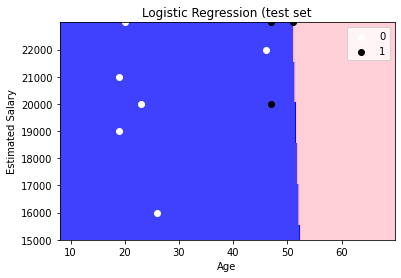

In [22]:
x_set, y_set = sc.inverse_transform(x_test), y_test

x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=0.25),
    np.arange(start=x_set[:, 1].min() - 1_000, stop=x_set[: 1].max() + 1000, step=0.25)
)

plt.contourf(
    x1,
    x2,
    model.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
    alpha=0.75,
    cmap=ListedColormap(("blue", "pink"))
)

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())


for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(("white", "black"))(i), label=j)

plt.title("Logistic Regression (test set")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()